# Initial Visualization of Transformed Data

In [1]:
%cd ..

/Users/lisaschmidt/Documents/GitHub/data-engineering-showcase


In [2]:
from project.geographical_visualizations import plot_routes_on_germany_map

In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

## Dataset 1: 

In [4]:
%pwd

'/Users/lisaschmidt/Documents/GitHub/data-engineering-showcase'

In [5]:
cnx = sqlite3.connect('data/connections.sqlite')
df_connections = pd.read_sql_query("SELECT * FROM connections", cnx)
df_connections

,start,end,transport_type,route,duration,driving_distance
0,Bremerhaven,Marl,car,LINESTRING(8.586580000000001 53.55175000000000...,152,288.831379
1,Bremerhaven,Marl,train,None,320,NaN
2,Bremerhaven,Marl,train,None,385,NaN
3,Bremerhaven,Marl,train,None,322,NaN
4,Dortmund,Karlsruhe,car,"LINESTRING(7.46417 51.51505, 7.461770000000000...",200,355.366236
...,...,...,...,...,...,...
40510,Chemnitz,Osnabrück,train,None,320,NaN
40511,Halle (Saale),Bielefeld,car,LINESTRING(11.970030000000001 51.4824400000000...,180,344.566496
40512,Halle (Saale),Bielefeld,train,None,231,NaN
40513,Halle (Saale),Bielefeld,train,None,192,NaN


In [6]:
df_connections.start.value_counts()

start
Bremerhaven                        394
Iserlohn                           394
Hamm                               394
Ingolstadt                         394
Gütersloh                          394
                                  ... 
Flughafen Karlsruhe/Baden-Baden     62
Flughafen Bremen                    55
Flughafen Nürnberg                  45
Flughafen Leipzig/Halle             36
Flughafen Münster/Osnabrück          8
Name: count, Length: 115, dtype: int64

(array([ 9991.,     0.,     0.,     0.,     0., 29106.,     0.,     0.,
            0.,  1418.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

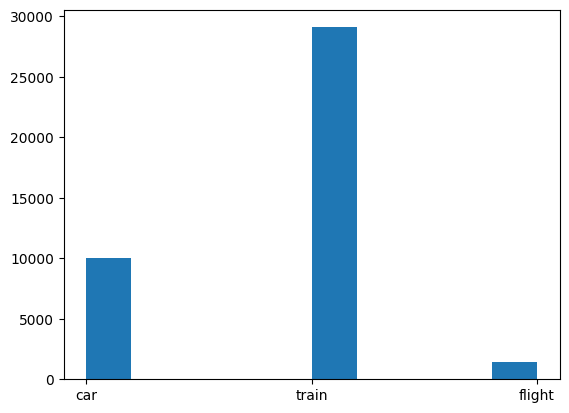

In [7]:
plt.hist(df_connections.transport_type)

(array([6.8410e+03, 1.0266e+04, 1.2493e+04, 7.4230e+03, 2.5340e+03,
        6.6000e+02, 2.0100e+02, 6.2000e+01, 2.3000e+01, 1.2000e+01]),
 array([   4. ,  105.4,  206.8,  308.2,  409.6,  511. ,  612.4,  713.8,
         815.2,  916.6, 1018. ]),
 <BarContainer object of 10 artists>)

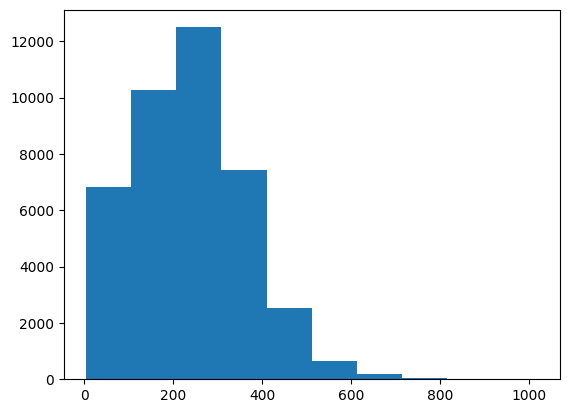

In [8]:
plt.hist(df_connections.duration)

In [9]:
bremerhaven_marl = df_connections.iloc[:1]
bremerhaven_marl

,start,end,transport_type,route,duration,driving_distance
0,Bremerhaven,Marl,car,LINESTRING(8.586580000000001 53.55175000000000...,152,288.831379


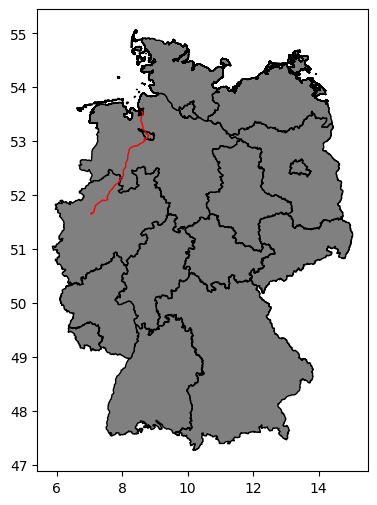

In [10]:
plot_routes_on_germany_map(bremerhaven_marl)

In [11]:
erlangen_outgoing = df_connections[df_connections.start == "Erlangen"]
erlangen_outgoing

,start,end,transport_type,route,duration,driving_distance
56,Erlangen,Wuppertal,car,LINESTRING(11.003060000000001 49.5980900000000...,241,432.445817
57,Erlangen,Wuppertal,train,None,257,NaN
58,Erlangen,Wuppertal,train,None,372,NaN
59,Erlangen,Wuppertal,train,None,265,NaN
236,Erlangen,Mülheim an der Ruhr,car,LINESTRING(11.003060000000001 49.5980900000000...,248,443.864336
...,...,...,...,...,...,...
38927,Erlangen,München,train,None,98,NaN
39855,Erlangen,Osnabrück,car,LINESTRING(11.003060000000001 49.5980900000000...,243,455.850762
39856,Erlangen,Osnabrück,train,None,319,NaN
39857,Erlangen,Osnabrück,train,None,387,NaN


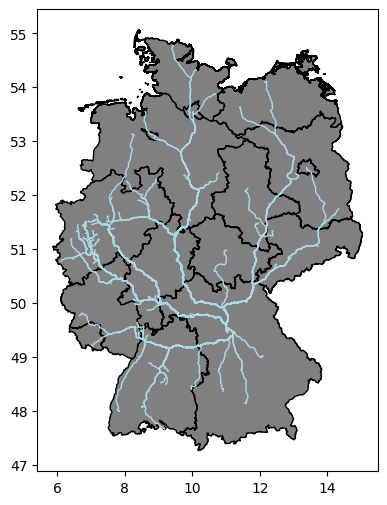

In [12]:
plot_routes_on_germany_map(erlangen_outgoing, color="lightblue")

## Dataset 2: 

In [13]:
cnx = sqlite3.connect('data/charging_points_germany.sqlite')
df_chargers = pd.read_sql_query("SELECT * FROM chargers", cnx)
df_chargers

,operator,city,state,district,latitude,longitude,rated_capacity
0,Albwerk GmbH & Co. KG,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,22.0
1,smopi,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,22.0
2,Albwerk GmbH & Co. KG,Westerheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.510500,9.609000,22.0
3,EnBW mobility+ AG und Co.KG,Amstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.578534,9.874840,98.0
4,SWU Energie GmbH,Balzheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.179959,10.076977,22.0
...,...,...,...,...,...,...,...
54218,TEAG Mobil GmbH,Obertrebra,Thüringen,Landkreis Weimarer Land,51.060798,11.565503,300.0
54219,EnBW mobility+ AG und Co.KG,Apolda,Thüringen,Landkreis Weimarer Land,51.028940,11.517130,300.0
54220,EnBW mobility+ AG und Co.KG,Apolda,Thüringen,Landkreis Weimarer Land,51.028940,11.517130,300.0
54221,TEAG Mobil GmbH,Großheringen,Thüringen,Landkreis Weimarer Land,51.107188,11.659489,30.0


([<matplotlib.patches.Wedge at 0x15c53d3d0>,
 [Text(1.0871184305178545, 0.16784968879445938, 'EnBW mobility+ AG und Co.KG '),
  Text(0.9934628212031757, 0.47226223953120267, 'E.ON Drive GmbH'),
  Text(0.8799100171320937, 0.6601199601213392, 'EWE Go GmbH'),
  Text(0.7961500925886928, 0.7590421793754388, 'Audi AG'),
  Text(0.7075029659636367, 0.8422823476439817, 'Privatperson'),
  Text(0.6167163009332979, 0.9108572907778419, 'Westenergie Metering GmbH'),
  Text(0.5262290801838406, 0.9659621913764892, 'Mercedes-Benz AG'),
  Text(0.4332047613965205, 1.01110515511661, 'Stromnetz Hamburg GmbH'),
  Text(0.3412034410758555, 1.0457438557304535, 'Tesla Germany GmbH'),
  Text(0.25193958346618683, 1.0707597518971679, 'ubitricity Gesellschaft für verteilte Energiesysteme mbH'),
  Text(-0.8481760815738892, -0.7004265376511398, 'others')])

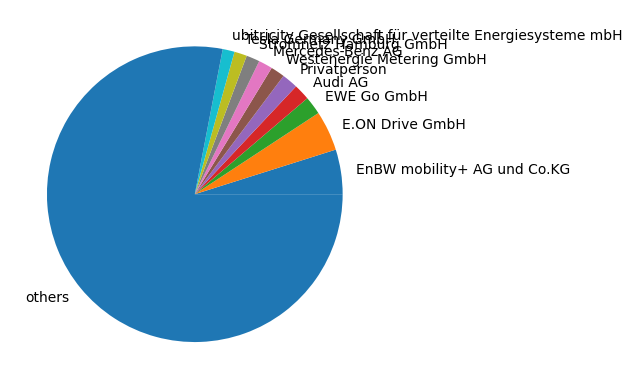

In [14]:
sizes = df_chargers.operator.value_counts().values
others = sizes[10:].sum()
sizes = np.append(sizes[:10], [others])

labels = df_chargers.operator.value_counts().keys()[:10]
labels = np.append(labels, ["others"])

plt.pie(sizes, labels=labels)

<BarContainer object of 16 artists>

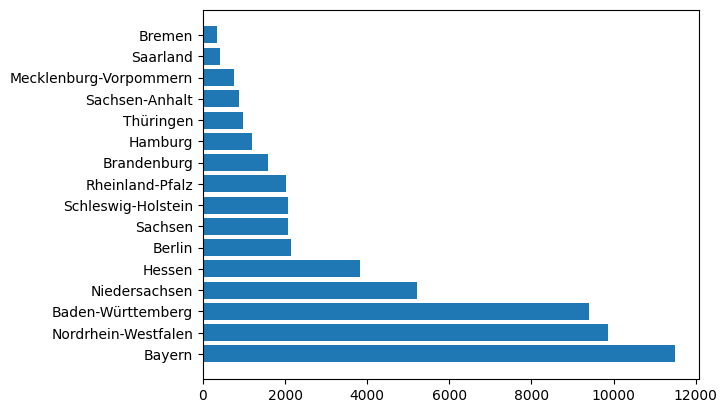

In [15]:
states = df_chargers.state.value_counts().keys()
count_chargers = df_chargers.state.value_counts().values


plt.barh(states, count_chargers)

In [16]:
# in kW
df_chargers.rated_capacity.sum()

3239871.71

## Dataset 3

In [17]:
cnx = sqlite3.connect('data/charging_points_development.sqlite')
df_development = pd.read_sql_query("SELECT * FROM districts", cnx)
df_development

,location,state,2017,2018,2019,2020,2021,2022,2023
0,Alb-Donau,Baden-Württemberg,20,22,57,116,152,183,244
1,Biberach,Baden-Württemberg,8,10,33,73,103,125,161
2,Böblingen,Baden-Württemberg,19,26,67,148,261,394,1193
3,Bodensee,Baden-Württemberg,68,72,125,171,215,262,357
4,Breisgau-Hochschwarzwald,Baden-Württemberg,36,41,61,98,163,252,426
...,...,...,...,...,...,...,...,...,...
396,Sömmerda,Thüringen,0,2,6,12,15,25,34
397,Sonneberg,Thüringen,0,8,12,12,12,23,63
398,Unstrut-Hainich,Thüringen,4,33,37,41,41,47,75
399,Wartburg,Thüringen,2,10,20,24,37,47,55


In [18]:
years = [str(d) for d in range(2017,2024)]
values = df_development.sum(axis=0)[2:]

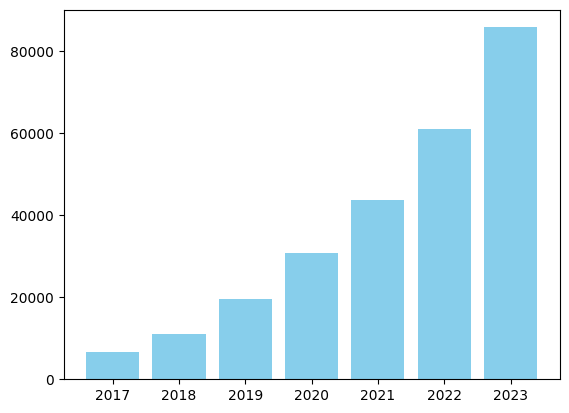

In [19]:
bars = plt.bar(years, values, color='skyblue') 

In [20]:
cagr = ((df_development["2023"] / df_development["2017"]) ** (1 / 6) - 1) * 100
df_development["cagr"] = cagr
df_development

,location,state,2017,2018,2019,2020,2021,2022,2023,cagr
0,Alb-Donau,Baden-Württemberg,20,22,57,116,152,183,244,51.725987
1,Biberach,Baden-Württemberg,8,10,33,73,103,125,161,64.926072
2,Böblingen,Baden-Württemberg,19,26,67,148,261,394,1193,99.364490
3,Bodensee,Baden-Württemberg,68,72,125,171,215,262,357,31.833733
4,Breisgau-Hochschwarzwald,Baden-Württemberg,36,41,61,98,163,252,426,50.956279
...,...,...,...,...,...,...,...,...,...,...
396,Sömmerda,Thüringen,0,2,6,12,15,25,34,inf
397,Sonneberg,Thüringen,0,8,12,12,12,23,63,inf
398,Unstrut-Hainich,Thüringen,4,33,37,41,41,47,75,62.992221
399,Wartburg,Thüringen,2,10,20,24,37,47,55,73.735586


In [21]:
df_development[df_development.cagr < float('+inf')].sort_values(by="cagr") 

,location,state,2017,2018,2019,2020,2021,2022,2023,cagr
123,Regen,Bayern,120,134,136,143,159,89,119,-0.139374
132,Straubing-Bogen,Bayern,79,89,95,108,122,97,132,8.932584
83,Deggendorf,Bayern,70,80,94,96,107,110,147,13.162678
93,Freyung-Grafenau,Bayern,63,79,84,93,107,119,137,13.822993
64,Schwabach,Bayern,8,10,12,12,16,16,20,16.499305
...,...,...,...,...,...,...,...,...,...,...
89,Erding,Bayern,1,9,25,55,73,84,197,141.218736
171,Groß-Gerau,Hessen,5,21,65,79,96,596,994,141.584684
159,Bremen,Bremen,2,42,78,228,282,336,516,152.311251
187,Wetterau,Hessen,1,1,73,84,115,173,272,154.543191
